# Buiding the churn prediction model using popular classification models such logistic regression, random forest and gradient boosting tree.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [7]:
df = pd.read_csv('data/df_model_final.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30771 entries, 0 to 30770
Data columns (total 22 columns):
uid                      30771 non-null int64
churn                    30771 non-null int64
freq_P_last_1            30771 non-null int64
freq_P_last_3            30771 non-null int64
freq_P_last_7            30771 non-null int64
freq_P_last_14           30771 non-null int64
freq_P_last_30           30771 non-null int64
freq_D_last_1            30771 non-null int64
freq_D_last_3            30771 non-null int64
freq_D_last_7            30771 non-null int64
freq_D_last_14           30771 non-null int64
freq_D_last_30           30771 non-null int64
freq_S_last_1            30771 non-null int64
freq_S_last_3            30771 non-null int64
freq_S_last_7            30771 non-null int64
freq_S_last_14           30771 non-null int64
freq_S_last_30           30771 non-null int64
freq_finished_last_1     30771 non-null int64
freq_finished_last_3     30771 non-null int64
freq_finished_las

In [9]:
df.describe()

,uid,churn,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_D_last_1,freq_D_last_3,freq_D_last_7,...,freq_S_last_1,freq_S_last_3,freq_S_last_7,freq_S_last_14,freq_S_last_30,freq_finished_last_1,freq_finished_last_3,freq_finished_last_7,freq_finished_last_14,freq_finished_last_30
count,3.077100e+04,30771.000000,30771.000000,30771.000000,30771.000000,30771.000000,30771.000000,30771.000000,30771.000000,30771.000000,...,30771.000000,30771.000000,30771.000000,30771.000000,30771.000000,30771.000000,30771.000000,30771.000000,30771.000000,30771.000000
mean,1.673234e+08,0.521140,5.578727,17.539469,38.781743,83.994508,217.867018,0.171363,0.464756,1.075363,...,0.212083,0.506353,1.724773,4.165058,15.741412,0.283579,0.904488,1.897631,4.166455,11.119073
std,1.062150e+07,0.499561,22.113684,59.556689,109.105099,206.265762,451.555677,4.564048,6.262248,9.234243,...,1.797083,2.783684,6.993149,13.661822,35.206003,3.487689,9.811712,19.064688,38.527098,82.536248
min,3.129400e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.679837e+08,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.684111e+08,1.000000,0.000000,0.000000,0.000000,6.000000,79.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.687411e+08,1.000000,0.000000,7.000000,29.000000,79.000000,241.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.692570e+08,1.000000,798.000000,2664.000000,3833.000000,7590.000000,35008.000000,643.000000,644.000000,644.000000,...,150.000000,171.000000,353.000000,578.000000,1330.000000,177.000000,399.000000,831.000000,2050.000000,4669.000000


In [10]:
df.head(10)

,uid,churn,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_D_last_1,freq_D_last_3,freq_D_last_7,...,freq_S_last_1,freq_S_last_3,freq_S_last_7,freq_S_last_14,freq_S_last_30,freq_finished_last_1,freq_finished_last_3,freq_finished_last_7,freq_finished_last_14,freq_finished_last_30
0,159183409,0,0,0,1,79,547,0,0,0,...,0,0,2,2,9,0,0,0,0,0
1,165374841,1,0,0,0,0,62,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,167587629,1,0,0,0,0,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,167589113,1,0,0,0,42,214,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,167595244,1,0,0,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,167612678,1,0,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,167614373,0,0,0,0,0,47,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,167614845,1,0,0,0,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,167622696,1,0,0,0,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,167631789,1,0,0,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [14]:
selected_features = list(df.columns.values)

In [15]:
selected_features.remove('uid')
selected_features.remove('churn')
selected_features

['freq_P_last_1',
 'freq_P_last_3',
 'freq_P_last_7',
 'freq_P_last_14',
 'freq_P_last_30',
 'freq_D_last_1',
 'freq_D_last_3',
 'freq_D_last_7',
 'freq_D_last_14',
 'freq_D_last_30',
 'freq_S_last_1',
 'freq_S_last_3',
 'freq_S_last_7',
 'freq_S_last_14',
 'freq_S_last_30',
 'freq_finished_last_1',
 'freq_finished_last_3',
 'freq_finished_last_7',
 'freq_finished_last_14',
 'freq_finished_last_30']

In [17]:
X = df[selected_features]
y = df['churn']

In [19]:
X.shape

(30771, 20)

In [20]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [23]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [24]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

## Logistic regression

              train      test
metrics                      
AUC        0.871086  0.867509
Accuracy   0.764097  0.755808
Precision  0.708652  0.699738
Recall     0.930994  0.924261
f1-score   0.804748  0.796479


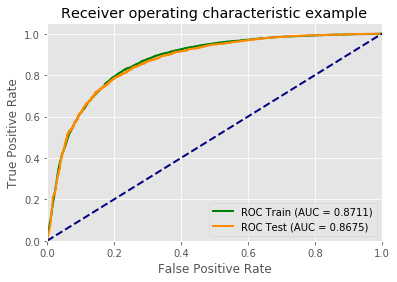

In [25]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')
# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

## Random forest

              train      test
metrics                      
AUC        0.916061  0.904178
Accuracy   0.837992  0.830869
Precision  0.824239  0.821955
Recall     0.876692  0.858894
f1-score   0.849657  0.840018


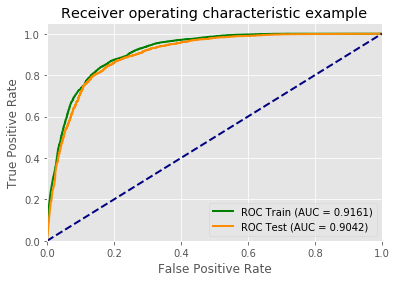

In [26]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

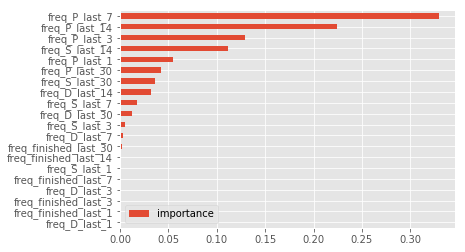

In [27]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
plt.show()

## Gradient boosting tree

              train      test
metrics                      
AUC        0.920149  0.903771
Accuracy   0.849976  0.828107
Precision  0.848725  0.833962
Recall     0.867279  0.833438
f1-score   0.857901  0.833700


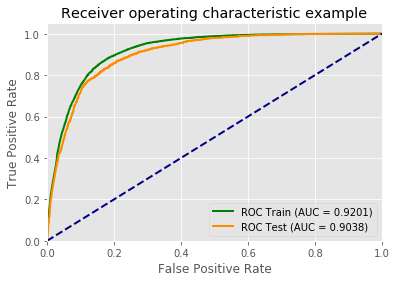

In [28]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

## Hyperparameter tuning using grid search

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.945250  0.904013
Accuracy   0.885968  0.830707
Precision  0.876772  0.836266
Recall     0.909445  0.836266
f1-score   0.892809  0.836266


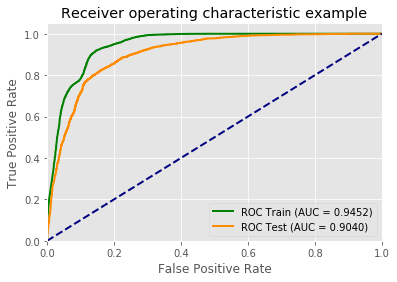

In [31]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)